# Shortest Path

The following code solves the shortest path problem as a linear program. Obviously this is a very inefficient way to solve the shortest path. But the following code demonstrates how can use tuplelist and dictionaries in python + gurobi.

The code uses the following input file: [AhujaNet.txt](https://github.com/avinashu1980/Intro_Python_Gurobi/blob/master/AhujaNet.txt). Make sure the input file is in the same folder as the notebook.

In [1]:
from gurobipy import *
import matplotlib.pyplot as plt
import networkx as nx

The following lines are for reading the input file and intializing the parameters. Note that links is a tuplelist. For more on tuplelists, refer to gurobi quick start guide.

In [2]:
f = open("AhujaNet.txt", "r")
line = f.readline()
line = line.strip('\n')
data = line.split(':')
num_nodes = int(data[1])
line = f.readline()
line = line.strip('\n')
data = line.split(':')
num_arcs = int(data[1])
line = f.readline()
line = line.strip('\n')
data = line.split(':')
origin = int(data[1])
line = f.readline()
line = line.strip('\n')
data = line.split(':')
destination = int(data[1])
line = f.readline()
line = f.readline()

links = tuplelist()
cost  = {}
while(len(line)):
    line = line.strip('\n')
    data = line.split()
    from_node = int(data[0])
    to_node = int(data[1])
    cost_arc = float(data[2])
    links.append((from_node,to_node))
    cost[from_node, to_node] = cost_arc
    line = f.readline()
f.close() 

Notice that the variable addition step has become very compact compared to previous examples.

In [3]:
m = Model('SP')
x = m.addVars(links, obj=cost, name ="flow")

Same with the constraints. The following is the flow balance constraint which ensures the path structure.

In [4]:
for i in range(1, num_nodes+1):
    m.addConstr( sum(x[i,j] for i,j in links.select(i, '*')) - sum(x[j,i] for j,i in links.select('*',i)) == 
                     (1 if i==origin else -1 if i==destination else 0 ),'node%s_' % i )

m.optimize() 

Optimize a model with 6 rows, 9 columns and 18 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 3 rows and 3 columns
Presolve time: 0.00s
Presolved: 3 rows, 6 columns, 12 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.0000000e+00   0.000000e+00   0.000000e+00      0s
       0    6.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  6.000000000e+00


The optimal solution is printed if found.

In [5]:
if m.status == GRB.Status.OPTIMAL:
   print('The final solution is:')
   for i,j in links:
       if(x[i,j].x > 0):
           print(i, j, x[i,j].x)

The final solution is:
1 2 1.0
2 5 1.0
5 6 1.0


The following set of code is used to visualize the final solution.

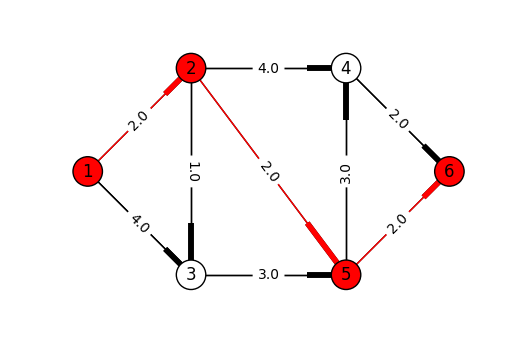

In [6]:
G=nx.DiGraph()
list_nodes = list(range(1, num_nodes+1))
G.add_nodes_from(list_nodes)
for i,j in links:
    G.add_edge(i,j)

# Adding the position attribute to each node
node_pos = {1: (0, 0), 2: (2, 2), 3: (2, -2), 4: (5, 2), 5: (5, -2), 6: (7, 0)}

# Create a list of edges in shortest path
red_edges = [(i,j) for i,j in links if x[i,j].x > 0]

#Create a list of nodes in shortest path
sp = [ i for i,j in links if x[i,j].x > 0 ]
sp.append(destination)

# If the node is in the shortest path, set it to red, else set it to white color
node_col = ['white' if not node in sp else 'red' for node in G.nodes()]
# If the edge is in the shortest path set it to red, else set it to white color
edge_col = ['black' if not edge in red_edges else 'red' for edge in G.edges()]
# Draw the nodes
nx.draw_networkx(G,node_pos, node_color= node_col, node_size=450)
# Draw the node labels
# nx.draw_networkx_labels(G1, node_pos,node_color= node_col)
# Draw the edges
nx.draw_networkx_edges(G, node_pos,edge_color= edge_col)
# Draw the edge labels
nx.draw_networkx_edge_labels(G, node_pos,edge_color= edge_col, edge_labels=cost)
# Remove the axis
plt.axis('off')

# Show the plot
plt.show()